In [15]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from matminer.datasets import load_dataset
from tqdm import tqdm

from pymatviz import ptable_heatmap, spacegroup_hist, spacegroup_sunburst
from pymatviz.utils import get_crystal_sys


pio.templates.default = "plotly_white"
# Comment out next line to get interactive plotly figures. Only used here since interactive
# figures don't show up at all in notebooks on GitHub. https://github.com/plotly/plotly.py/issues/931
pio.renderers.default = "svg"

plt.rc("font", size=14)
plt.rc("savefig", bbox="tight", dpi=200)
plt.rc("axes", titlesize=18, titleweight="bold")
plt.rcParams["figure.constrained_layout.use"] = True


In [16]:
df_diel = load_dataset("matbench_dielectric")
df_diel[["spg_symbol", "spg_num"]] = [
    struct.get_space_group_info() for struct in tqdm(df_diel.structure)
]
df_diel["crys_sys"] = df_diel.spg_num.map(get_crystal_sys)

100%|██████████| 4764/4764 [00:05<00:00, 889.58it/s] 


Text(0.5, 1.0, 'Elemental prevalence in the Matbench dielectric dataset')

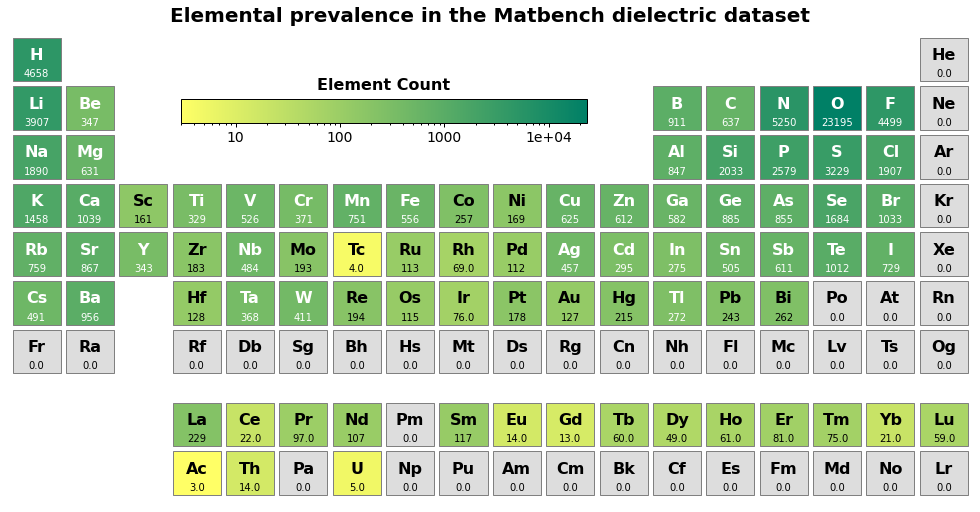

In [5]:
df_diel["volume"] = df_diel.structure.apply(lambda cryst: cryst.volume)
df_diel["formula"] = df_diel.structure.apply(lambda cryst: cryst.formula)

ptable_heatmap(df_diel.formula, log=True)
plt.title("Elements in Matbench Dielectric")

array([[<AxesSubplot:title={'center':'n'}>,
        <AxesSubplot:title={'center':'volume'}>, <AxesSubplot:>]],
      dtype=object)

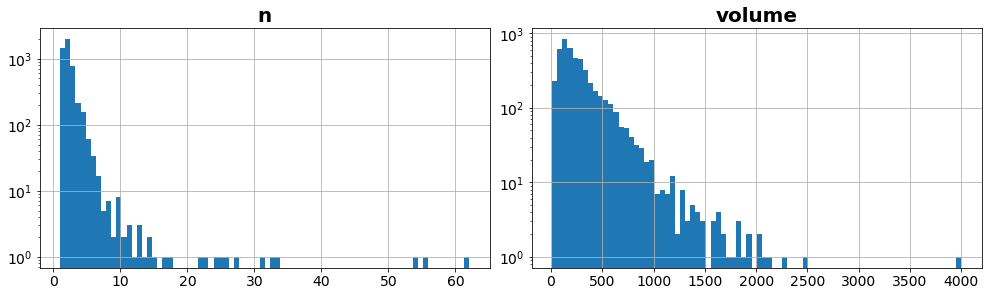

In [7]:
df_diel.hist(bins=80, log=True, figsize=(20, 4), layout=(1, 3))

Text(0.5, 1.1, 'Space group histogram')

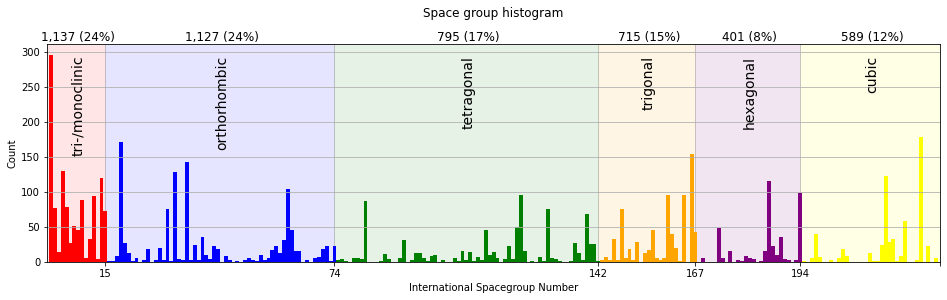

In [15]:
ax = spacegroup_hist(df_diel.spg_num)
ax.set_title("Space group histogram", y=1.1)
# plt.savefig("dielectric-spacegroup-hist.pdf")

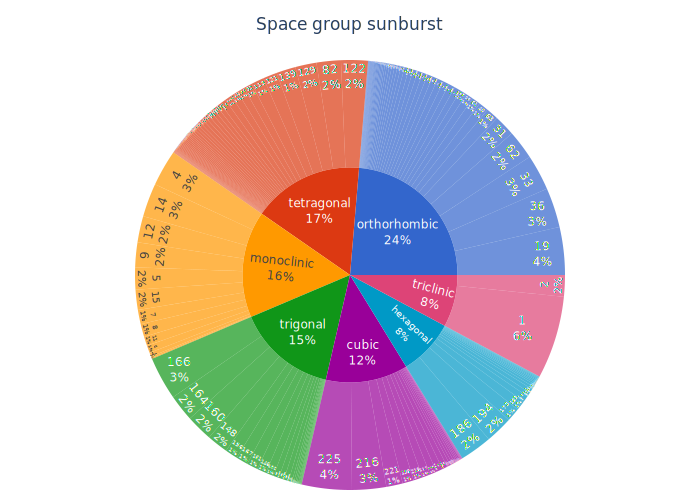

In [9]:
fig = spacegroup_sunburst(df_diel.spg_num, show_counts="percent")
fig.update_layout(title="Space group sunburst", title_x=0.5)
fig.show()

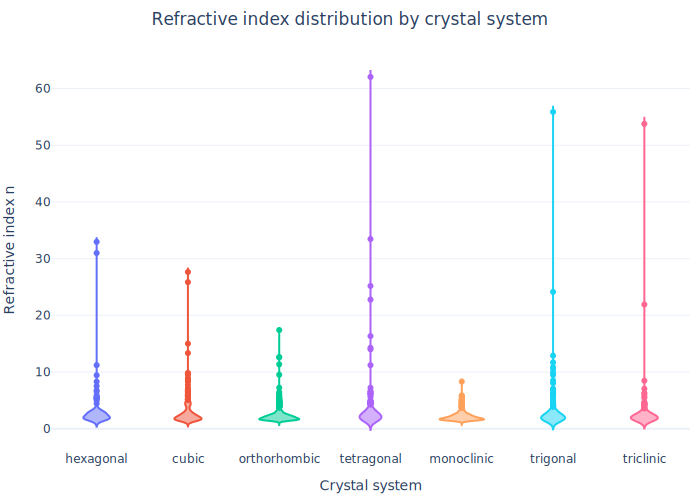

In [18]:
labels = {"crys_sys": "Crystal system", "n": "Refractive index n"}

fig = px.violin(df_diel, color="crys_sys", x="crys_sys", y="n", labels=labels)
fig.update_layout(
    title="Refractive index distribution by crystal system",
    title_x=0.5,
    margin=dict(b=10, l=10, r=10, t=50),
    showlegend=False,
)
fig.show()
